### K-means clustering on Used Car Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/cars_clean.csv')
df.head()

,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,CarRange
0,automatic,silver,0.190,2010,gasoline,False,gasoline,0.294872,universal,False,owned,all,0.217984,False,0.094118,0.006452,0.007168,"$10,000 - $20,000"
1,automatic,blue,0.290,2002,gasoline,False,gasoline,0.358974,universal,False,owned,all,0.099982,True,0.129412,0.028495,0.037186,"Less than $10,000"
2,automatic,red,0.402,2001,gasoline,False,gasoline,0.294872,suv,False,owned,all,0.055981,True,0.035294,0.038172,0.067652,"Less than $10,000"
3,mechanical,blue,0.010,1999,gasoline,False,gasoline,0.358974,sedan,False,owned,all,0.199964,True,0.094118,0.022043,0.038530,"Less than $10,000"
4,automatic,black,0.280,2001,gasoline,False,gasoline,0.294872,universal,False,owned,all,0.042663,True,0.152941,0.003226,0.003136,"Less than $10,000"


In [3]:
from sklearn.model_selection import train_test_split

# convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# # split data into training and test sets for unsupervised learning
# X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
def plot_clusters(X, n_clusters=2, random_state=42):
    """
    Plots the clusters formed by k-means clustering.
    
    Args:
        X (pandas.DataFrame): Training Data to cluster.
        n_clusters (int): Number of clusters to form.
        random_state (int): Random state for k-means.
    """
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import MinMaxScaler
    
    # scale data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X_scaled)
    
    # plot clusters and centroids
    for i in range(n_clusters):
        plt.scatter(X_scaled[kmeans.labels_ == i, 0], X_scaled[kmeans.labels_ == i, 1], label='Cluster {}'.format(i))
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', label='Centroids')
    plt.title('Clusters')
    plt.xlabel('MPG')
    plt.ylabel('Weight')
    plt.legend()
    plt.show()

    return kmeans.inertia_

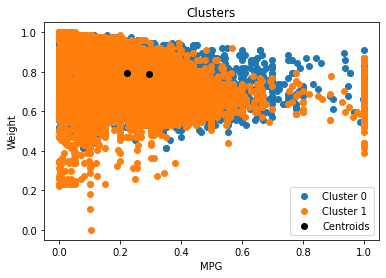

102534.20779521072

In [5]:
# plot clusters for 2 clusters
plot_clusters(df, n_clusters=2)

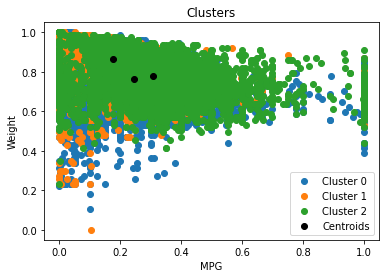

93809.87676571327

In [6]:
plot_clusters(df, n_clusters=3)

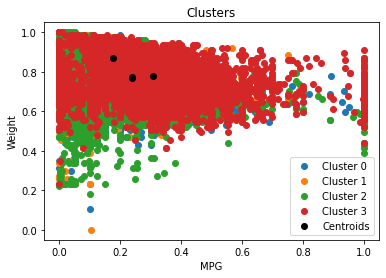

86491.24222385533

In [7]:
plot_clusters(df, n_clusters=4)

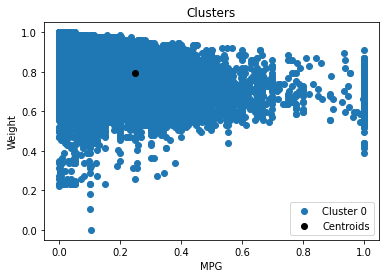

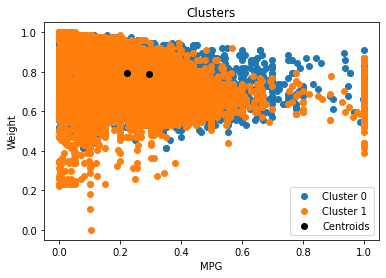

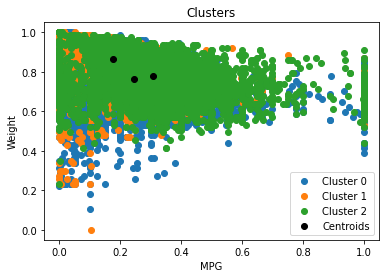

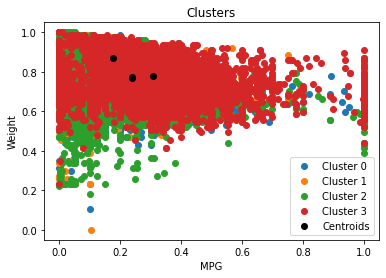

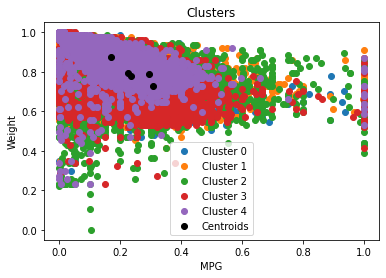

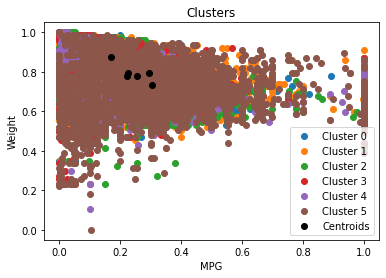

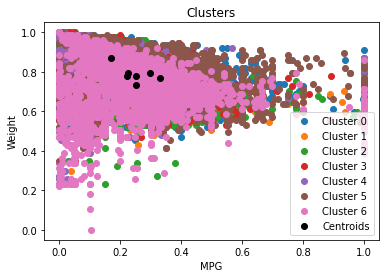

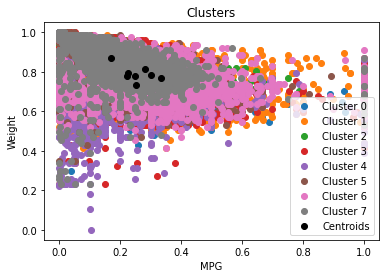

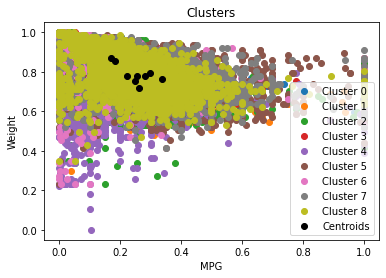

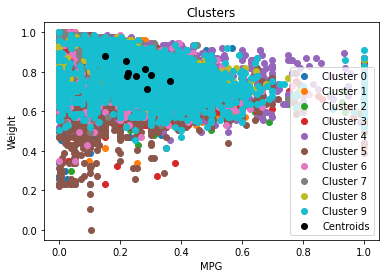

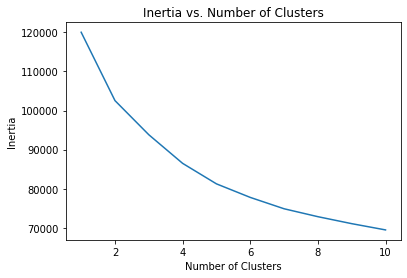

In [8]:
# determine optimal number of clusters using inertia vs. number of clusters
inertia = []
for i in range(10):
    kmeans_inertia = plot_clusters(df, n_clusters=i+1, random_state=42)
    inertia.append(kmeans_inertia)

# plot inertia vs. number of clusters
plt.plot(range(1, 11), inertia)
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

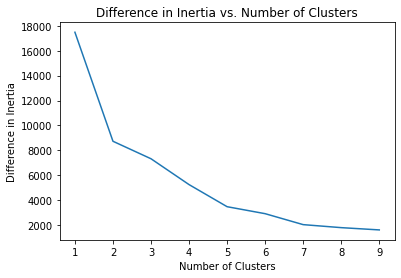

In [9]:
# find the absolute value of the difference between inertia values for each number of clusters
inertia_diff = [abs(inertia[i] - inertia[i+1]) for i in range(len(inertia)-1)]

# plot the difference in inertia values for each number of clusters
plt.plot(range(1, 10), inertia_diff)
plt.title('Difference in Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Difference in Inertia')
plt.show()

According to the elbow method, the optimal number of clusters is 2. I considered using inertia as a metric for determining the optimal cluster count. Inertia is a measure of how spread out the clusters are. The lower the inertia, the more spread out the clusters are. The elbow method is a heuristic method for determining the optimal number of clusters. It is based on the idea that the optimal number of clusters is the number of clusters where the decrease in inertia is the most significant. I arrived at the conclusion of 2 clusters being the optimal number of clusters because according to the elbow plot above, the inertia decreases significantly from 1 to 2 clusters, but then decreases much more slowly from 2 to 3 clusters. The subsequent clusters have a much smaller inertia, but the decrease in inertia is not as significant. Therefore, 2 clusters is the optimal number of clusters.

#### Insights from clustering analysis of the used cars market

The clusters are formed based on the car's MPG and weight. Based on 2 optimal number of clusters, I surmise there are two designations for each cluster as follows:
    - Low MPG and high weight
    - High MPG and low weight

The number of clusters allows us to determine segmentation of the used car market and understand potential decisions from the perspectives of a car manufacturer and the consumer. One possible decision based on the cluster analysis is determining production priority. If the manufacturer wants to produce a car that is more fuel efficient, they can produce a car that has a high MPG but a low weight. According to the cluster plot, the consumer may be willing to pay more for a car with high MPG and low weight.